# Data Science

## Comisión: 42365

### Tutor: Tomás Insua

### Alumno: Francisco Villella

#### Entrega de Entrega de Proyecto DS Parte II

In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

#### Abstract:
El conjunto de datos proporcionado contiene información sobre propiedades en venta en Argentina, específicamente en la zona de Capital Federal y la provincia de Buenos Aires. Estos datos incluyen detalles como la ubicación geográfica, características de la propiedad (habitaciones, baños, superficie total y cubierta), precios, fechas de inicio y finalización de la venta, y otros atributos relevantes.

El objetivo principal de este conjunto de datos es brindar información sobre el mercado inmobiliario, permitiendo el análisis y la comprensión de los precios, características y tendencias relacionadas con la venta de propiedades.

Al examinar los datos, se observa una variedad de tipos de propiedades, incluyendo departamentos, PH y casas. También se destaca la diversidad en términos de superficies y número de habitaciones. Los precios de las propiedades varían ampliamente, lo que sugiere que hay opciones para diferentes presupuestos y preferencias.

El período de tiempo cubierto en este conjunto de datos se extiende desde octubre de 2019 hasta diciembre de 2019, con algunas ventas que se extienden hasta marzo de 2020. Esta ventana temporal permite analizar los patrones de venta en un período específico y obtener información sobre la estabilidad o fluctuación de los precios durante ese tiempo.

El conjunto de datos ofrece la posibilidad de realizar diversas investigaciones y análisis en el campo del mercado inmobiliario. Algunas posibles áreas de exploración incluyen la identificación de áreas geográficas con mayor actividad de venta, la relación entre características de la propiedad y precios, el impacto de la ubicación en los precios de venta y la detección de tendencias y patrones estacionales en el mercado.

En resumen, este conjunto de datos sobre propiedades en venta en Argentina proporciona una valiosa fuente de información para investigaciones y análisis relacionados con el mercado inmobiliario. Los datos geográficos, las características de la propiedad, los precios y las fechas de venta ofrecen una base sólida para comprender el panorama del mercado y tomar decisiones informadas.

# Definición de objetivo


El objetivo de este análisis es poder predecir el precio de las propiedades ubicadas en Buenos Aires, Argentina. Tambien se puede predecir la cantidad de ventas por mes para estimar las ganacias que percibira la inmobiliaria "Bienes Raices" y poder proyectar el plan de negocios para el proximo año.

# Contexto comercial


La inmobiliaria necesita saber como afrontar el proximo año segun las cantidad de operaciones de ventas para generar un plan de negocio ajustado a los resultados.

# Contexto analítico

Análisis del Mercado Inmobiliario en la Ciudad de Buenos Aires, Argentina

Los datos utilizados en este análisis fueron recopilados de una reconocida agencia inmobiliaria que opera en la Ciudad de Buenos Aires, Argentina. La agencia recopila información sobre propiedades disponibles para venta y alquiler en su base de datos. Los datos incluyen características detalladas de las propiedades, como ubicación geográfica, tipo de propiedad, número de habitaciones, superficie total y cubierta, número de baños, precios y fechas de publicación.

El objetivo principal de este análisis es comprender las tendencias y características del mercado inmobiliario en la Ciudad de Buenos Aires. El análisis busca proporcionar información valiosa para inversores, profesionales del sector inmobiliario y personas interesadas en el mercado de propiedades en la ciudad. Se pretende identificar patrones, determinar los factores que influyen en los precios y la demanda de propiedades, y ofrecer recomendaciones basadas en los resultados obtenidos.

El dataset utilizado en este análisis contiene las siguientes variables: "start_date" y "end_date" (fechas de inicio y finalización de la publicación del anuncio), "created_on" (fecha de creación del registro del anuncio), "lat" y "lon" (coordenadas geográficas de la ubicación de la propiedad), "l1", "l2" y "l3" (ubicación geográfica a nivel de país, provincia y barrio), "rooms" (número de habitaciones), "bedrooms" (número de dormitorios), "bathrooms" (número de baños), "surface_total" y "surface_covered" (superficie total y cubierta de la propiedad), "price" (precio de la propiedad), "currency" (moneda en la que se especifica el precio), "title" (título del anuncio), "description" (descripción detallada de la propiedad), "property_type" (tipo de propiedad, como departamento, casa, PH) y "operation_type" (tipo de operación, como venta o alquiler).


El análisis se centra en propiedades ubicadas en la Ciudad de Buenos Aires, Argentina. Se considera un período de tiempo específico que abarca desde enero de 2019 hasta enero de 2020 en el dataset. El alcance geográfico se limita a la ciudad y sus distintos barrios, lo que permite un enfoque más detallado y específico del mercado inmobiliario local.

El análisis está dirigido a inversores inmobiliarios y profesionales del sector inmobiliario para comprender el mercado inmobiliario en la Ciudad de Buenos Aires. Los resultados y conclusiones del análisis buscan brindar información relevante para la toma de decisiones y la comprensión del mercado inmobiliario local.


In [2]:
# Lectura de dataset

In [3]:
df = pd.read_csv("C:\\Users\\Fran\\DataScience\\prop_bs_as.csv", sep= ",")
df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [4]:
# Renombro las columnas

In [5]:
df = df.rename(columns={'start_date':'fecha_publicacion','end_date':'fecha_venta','created_on':'fecha_creacion','l1':'pais','l2':'zona','l3':'barrio','rooms':'ambientes','bedrooms':'dormitorios','bathrooms':'baños','surface_total':'superficie_total','surface_covered':'superficie_propia','price':'precio','currency':'moneda','title':'titulo','description':'descripcion','property_type':'tipo_propiedad','operation_type':'tipo_operacion'})
df

,fecha_publicacion,fecha_venta,fecha_creacion,lat,lon,pais,zona,barrio,ambientes,dormitorios,baños,superficie_total,superficie_propia,precio,moneda,titulo,descripcion,tipo_propiedad,tipo_operacion
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [6]:
# reviso informacion de las columnas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha_publicacion  146660 non-null  object 
 1   fecha_venta        146660 non-null  object 
 2   fecha_creacion     146660 non-null  object 
 3   lat                136735 non-null  float64
 4   lon                136701 non-null  float64
 5   pais               146660 non-null  object 
 6   zona               146660 non-null  object 
 7   barrio             146660 non-null  object 
 8   ambientes          146660 non-null  float64
 9   dormitorios        146660 non-null  float64
 10  baños              140703 non-null  float64
 11  superficie_total   126133 non-null  float64
 12  superficie_propia  125046 non-null  float64
 13  precio             146660 non-null  float64
 14  moneda             146660 non-null  object 
 15  titulo             146660 non-null  object 
 16  de

In [8]:
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])

In [9]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')

In [10]:
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])

In [11]:
# Remplazo Ph por departamento.

In [12]:
df = df.replace({'tipo_propiedad':{'PH':'Departamento'}})

In [13]:
# Calculo el precio del m2

In [14]:
df['precio_m2'] = df['precio'] / df['superficie_total']


In [15]:
#calculo el promedio de precio de los distintos tipos de propiedades segun zona

In [16]:
grupo = df.groupby(['zona', 'tipo_propiedad'])['precio_m2'].mean()


### Grafico 1 

#### Grafico Univariado

#### Pregunta e Hipotesis de interes

Pregunta: ¿Cuáles son los barrios con la mayor cantidad de inmuebles en el dataset?
    
Hipótesis: Los barrios más céntricos o populares tendrán una mayor cantidad de inmuebles en comparación con los barrios periféricos.

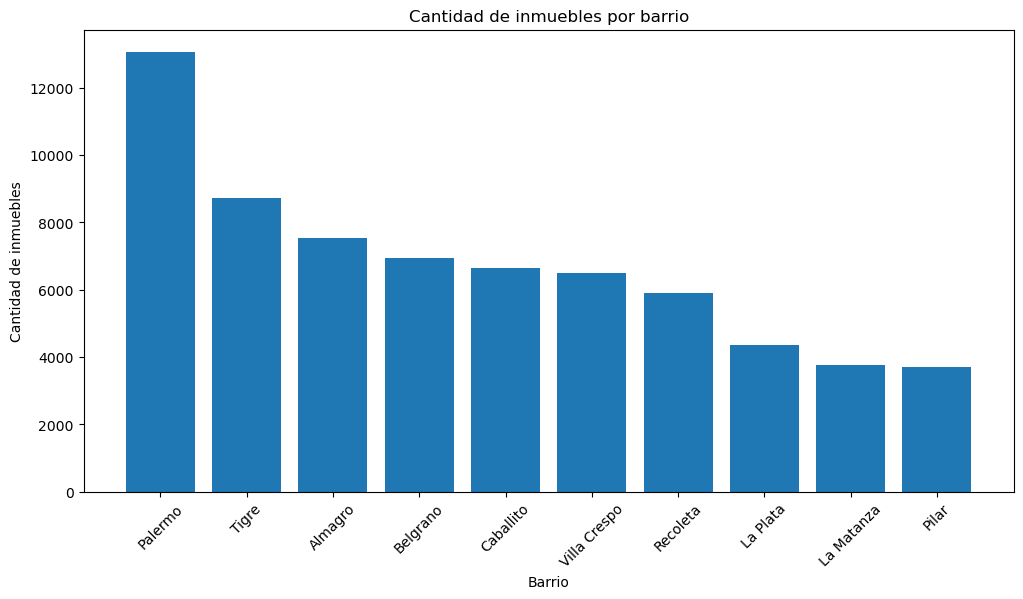

In [17]:
#conteo de propiedades por barrio
inmuebles_por_barrio = df.groupby('barrio').size().sort_values(ascending=False)

#Crear Grafico
plt.figure(figsize=(12, 6)) 
top_10_barrios = inmuebles_por_barrio.head(10)
plt.bar(top_10_barrios.index, top_10_barrios.values)
plt.title('Cantidad de inmuebles por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de inmuebles')
plt.xticks(rotation=45)  
plt.show()


#### La visualización permite identificar los barrios más populares en términos de inmuebles disponibles, lo que puede ser útil para comprender la dinámica del mercado inmobiliario y tomar decisiones informadas en relación a la ubicación de los inmuebles. Cabe destacar que el gráfico solo muestra los diez barrios con mayor cantidad de inmuebles, por lo que puede haber otros barrios con menor presencia en el gráfico pero que también sean relevantes en el contexto general.

### Grafico 2 

#### Grafico Univariado

#### Preguntas e Hipotesis de interés:
Pregunta: ¿Cuáles son los tipos de propiedad más comunes en el mercado inmobiliario?

Hipotesis: La mayoría de los inmuebles disponibles pertenecen al tipo de propiedad "Departamento".

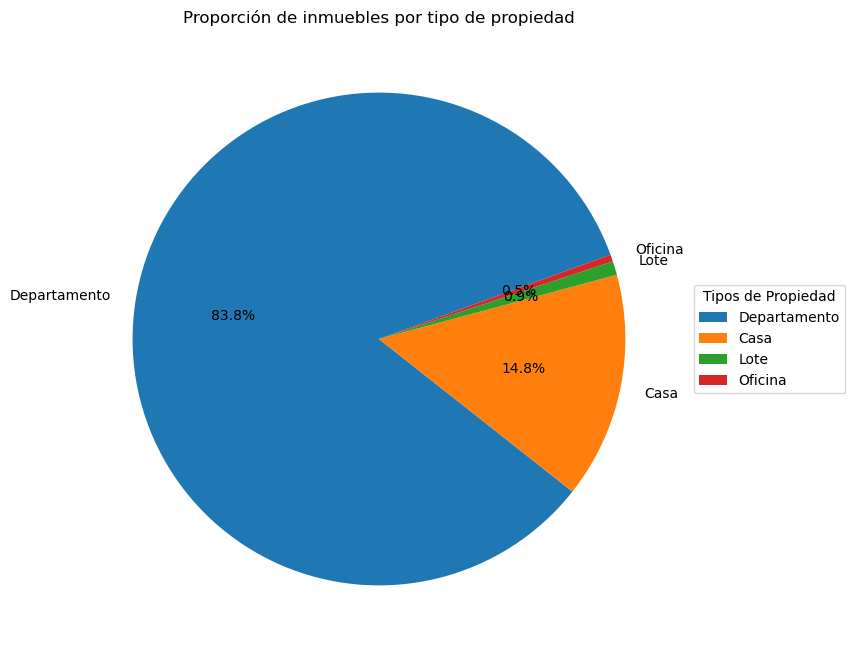

In [18]:
#conteo de tipo de propiedades
propiedades = df['tipo_propiedad'].value_counts().head(4)  

#Crear Grafico
plt.figure(figsize=(8, 8)) 
text = plt.pie(propiedades, labels=propiedades.index, autopct='%1.1f%%', startangle=20)
plt.legend(propiedades.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Tipos de Propiedad')
plt.title('Proporción de inmuebles por tipo de propiedad')
plt.show()

#### Esta representación visual permite identificar rápidamente cuáles son los tipos de propiedad más comunes en venta, y la distribución proporcional entre ellos. Puedes observar qué porcentaje del total corresponde a cada tipo de propiedad sin necesidad de realizar cálculos adicionales.


### Grafico 3 

#### Grafico Univariado

#### Preguntas e Hipotesis de interes
Pregunta:¿Cómo ha sido la variación del precio promedio de los departamentos en el año 2019?

Hipotesis: Los precios de los departamentos han experimentado fluctuaciones estacionales, con períodos de mayor demanda y precios más altos en ciertas épocas del año.

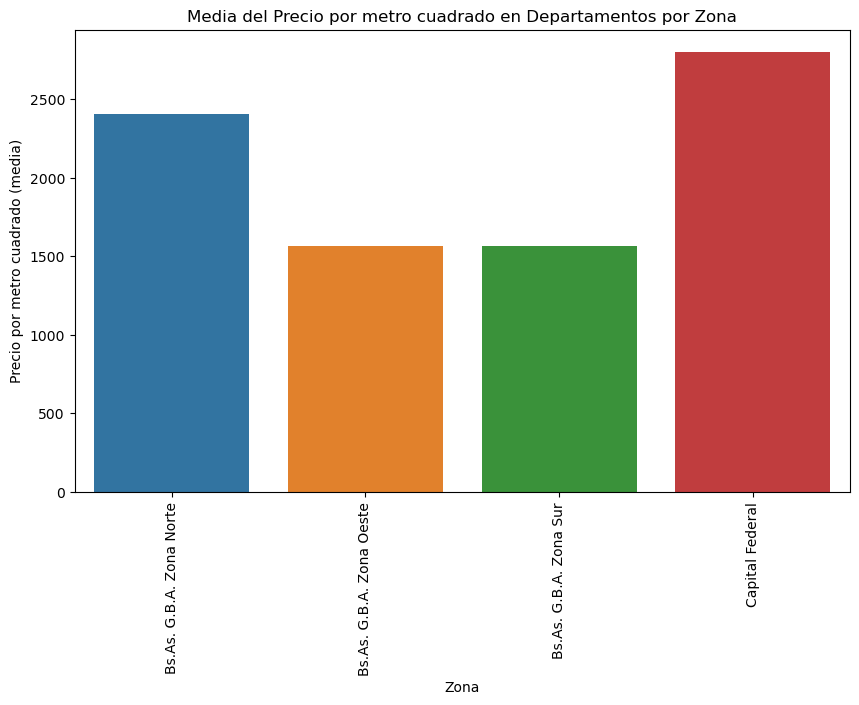

In [19]:
#filtro solo departamentos de la columna "tipo_propiedad"
departamentos_df = df.loc[df['tipo_propiedad'] == 'Departamento']
#calculo el promedio del precio del m2 por zona
prom_precio = departamentos_df.groupby('zona')['precio_m2'].mean().reset_index()

#Crear Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='zona', y='precio_m2', data=prom_precio)
plt.xlabel('Zona')
plt.ylabel('Precio por metro cuadrado (media)')
plt.title('Media del Precio por metro cuadrado en Departamentos por Zona')
plt.xticks(rotation=90)
plt.show()

#### Este gráfico es útil para comprender y analizar las tendencias del mercado inmobiliario en relación con los precios de los departamentos. Puede ayudar a identificar las zonas mas valoradas y evaluar la volatilidad del mercado y tomar decisiones informadas en función de las tendencias observadas.

### Grafico 4

#### Grafico Univariado

#### Preguntas e Hipotesis de interes
Pregunta: ¿Hay una tendencia general de aumento o disminución de la cantidad de propiedades publicadas a lo largo del año?

Hipótesis: La cantidad de propiedades publicadas tiende a aumentar o disminuir de manera gradual o cíclica a medida que transcurre el año.

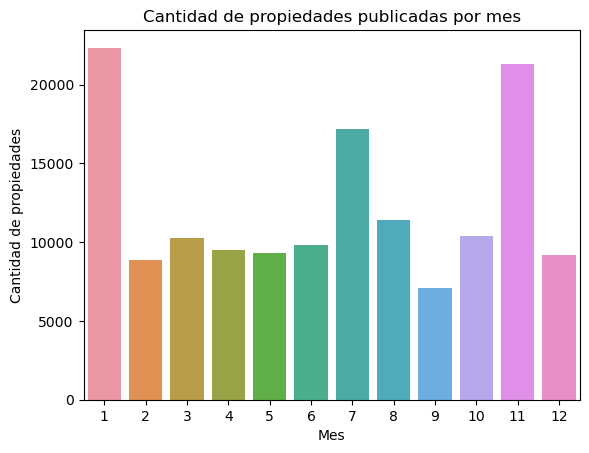

In [20]:
# extraigo solo los meses de la columna fecha_publicacion 
df['month'] = df['fecha_publicacion'].dt.month
propiedades_por_mes = df.groupby('month').size().reset_index(name='count')

# Crear Grafico
sns.barplot(data=propiedades_por_mes, x='month', y='count')
plt.title('Cantidad de propiedades publicadas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de propiedades')
plt.show()

#### El gráfico muestra la cantidad de propiedades publicadas por mes en función de la columna "start_date". Cada barra representa un mes y la altura de la barra indica la cantidad de propiedades publicadas en ese mes.Se puede ver una gran diferencia de publicaciones de enero y noviembre con relacion al resto de los meses. 

### Grafico 5

#### Grafico Bivariado

#### Preguntas e Hipotesis de interes
pregunta:¿Existe una relación entre el precio por metro cuadrado y el tamaño promedio del departamento?

Hipótesis: Existe una relación entre el precio por metro cuadrado y el tamaño promedio del departamento, lo que implica que los departamentos más grandes tienden a tener precios más altos.


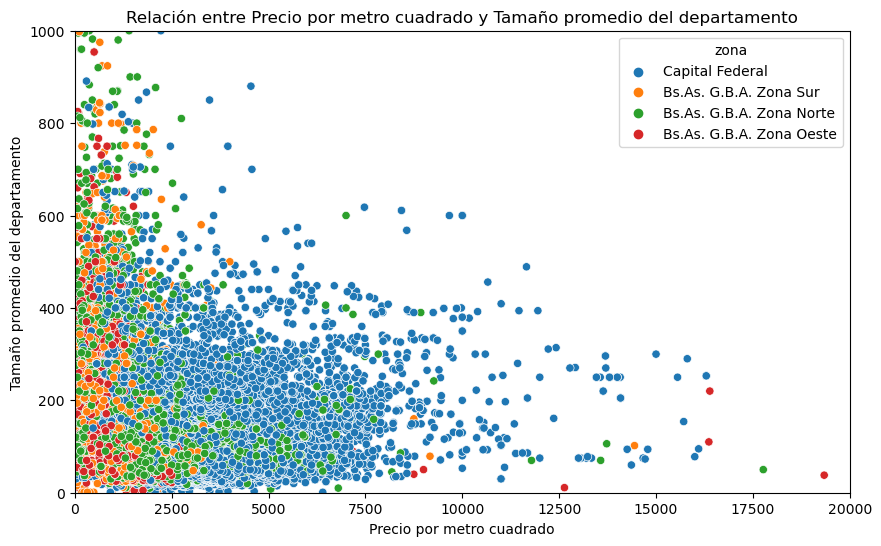

In [21]:
#Crear Grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precio_m2', y='superficie_propia', data=df, hue='zona')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Tamaño promedio del departamento')
plt.title('Relación entre Precio por metro cuadrado y Tamaño promedio del departamento')
plt.ylim(0, 1000)
plt.xlim(0, 20000)
plt.show()

#### En este grafico podemos ver que el valor del m2 si varia segun la zona, en el sur y oeste el precio del m2 es considerablemente menor si los comparamos con capital federal o Zona norte.

C:\Users\Fran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Fran\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Fran\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Fran\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\Fran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\1825291358.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


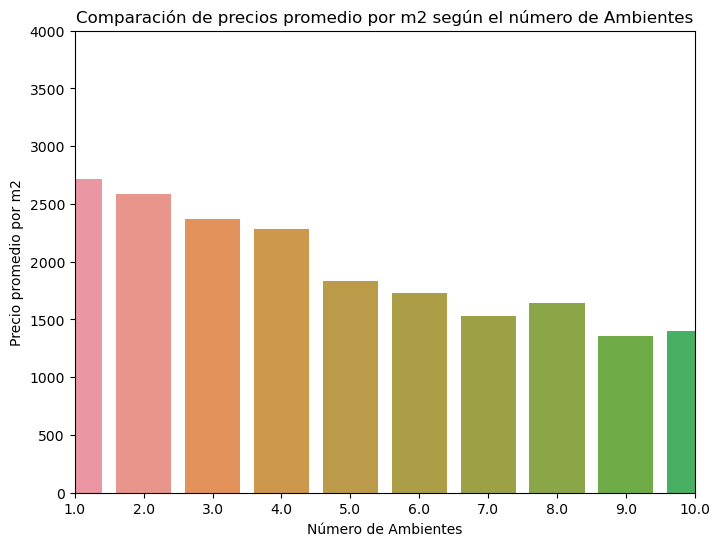

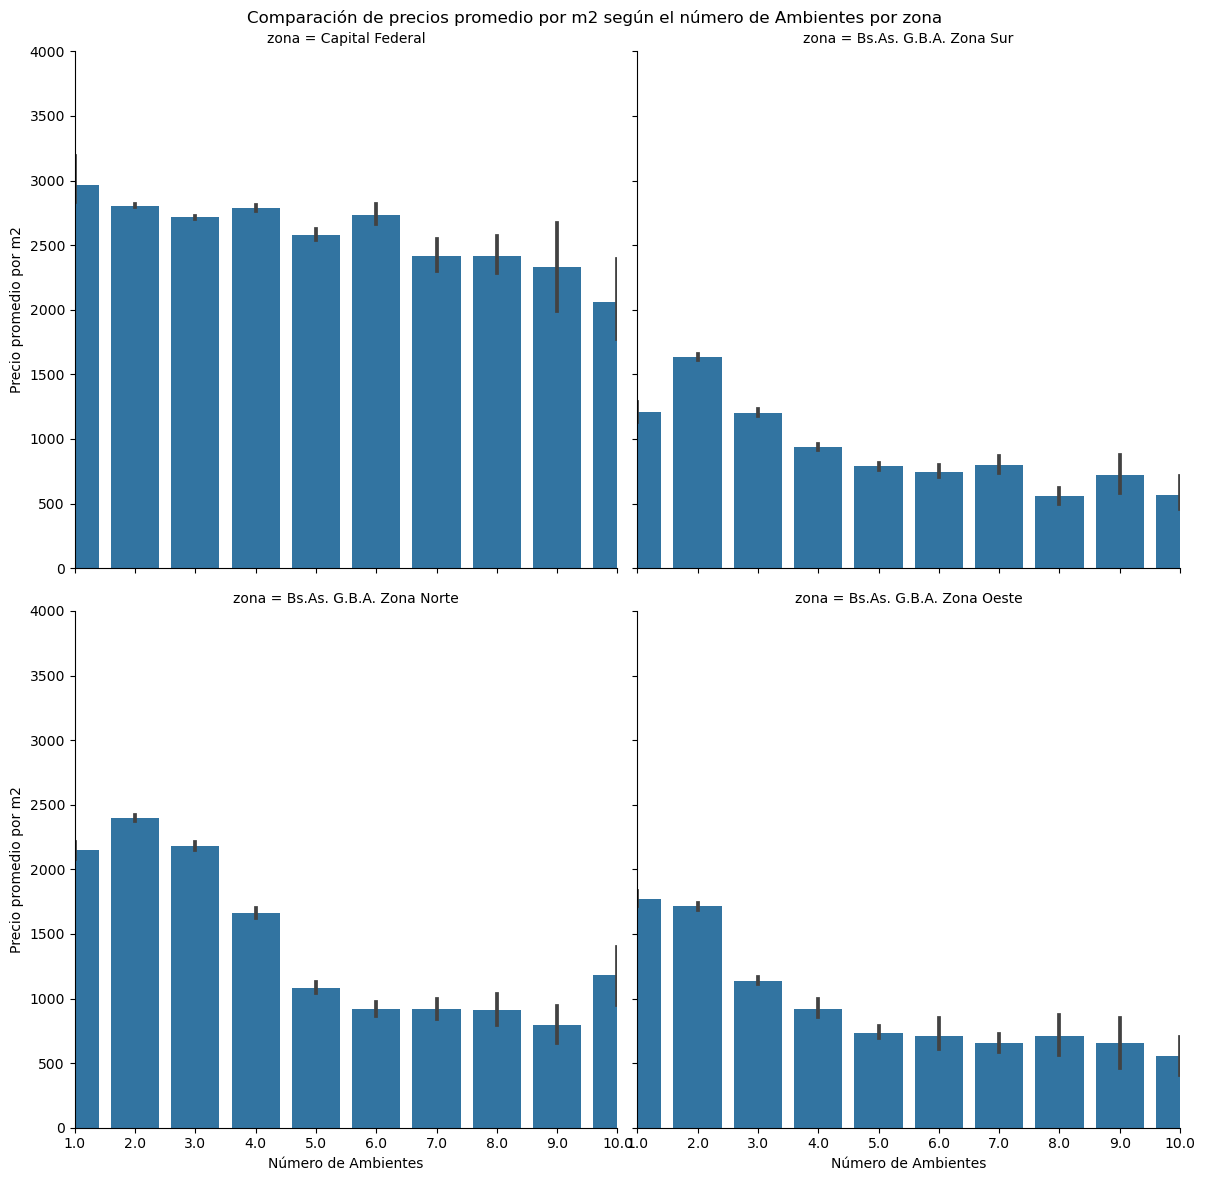

In [22]:
#calculo el promedio del precio del m2 segun la cantidad de ambientes
precios_promedio = df.groupby('ambientes')['precio_m2'].mean().reset_index()
#Crear Grafico
plt.figure(figsize=(8, 6))
sns.barplot(x='ambientes', y='precio_m2', data=precios_promedio)
plt.xlabel('Número de Ambientes')
plt.ylabel('Precio promedio por m2')
plt.title('Comparación de precios promedio por m2 según el número de Ambientes')
plt.ylim(0, 4000)
plt.xlim(0, 9)

# dividir en zonas 
g = sns.FacetGrid(df, col='zona', col_wrap=2, height=6)
g.map(sns.barplot, 'ambientes', 'precio_m2')
g.set_axis_labels('Número de Ambientes', 'Precio promedio por m2')
g.fig.suptitle('Comparación de precios promedio por m2 según el número de Ambientes por zona')
plt.tight_layout()
plt.ylim(0, 4000)
plt.xlim(0, 9)
plt.show()


In [23]:
# Limpieza de df

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fecha_publicacion  146660 non-null  datetime64[ns]
 1   fecha_venta        121559 non-null  datetime64[ns]
 2   fecha_creacion     146660 non-null  datetime64[ns]
 3   lat                136735 non-null  float64       
 4   lon                136701 non-null  float64       
 5   pais               146660 non-null  object        
 6   zona               146660 non-null  object        
 7   barrio             146660 non-null  object        
 8   ambientes          146660 non-null  float64       
 9   dormitorios        146660 non-null  float64       
 10  baños              140703 non-null  float64       
 11  superficie_total   126133 non-null  float64       
 12  superficie_propia  125046 non-null  float64       
 13  precio             146660 non-null  float64 

In [25]:
columnas_a_eliminar = ['fecha_publicacion','fecha_venta','month','fecha_creacion','superficie_total','precio_m2','barrio', 'lat', 'lon','pais','moneda','titulo','descripcion','tipo_operacion']  # Lista con los nombres de las columnas a eliminar
df= df.drop(columns=columnas_a_eliminar)

In [26]:
df

,zona,ambientes,dormitorios,baños,superficie_propia,precio,tipo_propiedad
0,Capital Federal,7.0,7.0,2.0,140.0,153000.0,Departamento
1,Capital Federal,2.0,1.0,2.0,58.0,159000.0,Departamento
2,Capital Federal,2.0,1.0,1.0,45.0,125000.0,Departamento
3,Capital Federal,2.0,1.0,1.0,50.0,295000.0,Departamento
4,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,35.0,40000.0,Departamento
...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,48.0,165000.0,Departamento
146656,Bs.As. G.B.A. Zona Norte,4.0,3.0,2.0,90.0,130000.0,Departamento
146657,Bs.As. G.B.A. Zona Norte,1.0,1.0,1.0,35.0,73000.0,Departamento
146658,Bs.As. G.B.A. Zona Norte,2.0,1.0,1.0,38.0,68000.0,Departamento


In [27]:
df.describe()

,ambientes,dormitorios,baños,superficie_propia,precio
count,146660.000000,146660.000000,140703.000000,125046.000000,1.466600e+05
mean,3.079817,1.983240,1.599994,112.818011,2.412211e+05
std,1.416352,1.151304,0.889324,916.857584,3.185195e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,126062.000000,3.243423e+07


In [92]:
# Corregir los valores mal cargados en la columna 'precio'
df['precio'] = df['precio'].astype(str).str.replace(r'(\d)(000)$', r'\1')

# Convertir la columna 'precio' de cadena a numérica
df['precio'] = pd.to_numeric(df['precio'])

# Ver los cambios en la columna 'precio'
print(df)

                            zona  ambientes  dormitorios  baños  \
0                Capital Federal        7.0          7.0    2.0   
1                Capital Federal        2.0          1.0    2.0   
2                Capital Federal        2.0          1.0    1.0   
3                Capital Federal        2.0          1.0    1.0   
4         Bs.As. G.B.A. Zona Sur        2.0          1.0    1.0   
...                          ...        ...          ...    ...   
146655    Bs.As. G.B.A. Zona Sur        2.0          1.0    1.0   
146656  Bs.As. G.B.A. Zona Norte        4.0          3.0    2.0   
146657  Bs.As. G.B.A. Zona Norte        1.0          1.0    1.0   
146658  Bs.As. G.B.A. Zona Norte        2.0          1.0    1.0   
146659  Bs.As. G.B.A. Zona Norte        3.0          2.0    1.0   

        superficie_propia    precio tipo_propiedad   predicciones  \
0                   140.0  153000.0   Departamento  183073.097222   
1                    58.0  159000.0   Departamento       

C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\2376762365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio'] = df['precio'].astype(str).str.replace(r'(\d)(000)$', r'\1')
C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\2376762365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio'] = pd.to_numeric(df['precio'])


In [29]:
df.describe()

,ambientes,dormitorios,baños,superficie_propia,precio
count,146660.000000,146660.000000,140703.000000,125046.000000,1.466600e+05
mean,3.079817,1.983240,1.599994,112.818011,2.412211e+05
std,1.416352,1.151304,0.889324,916.857584,3.185195e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,126062.000000,3.243423e+07


#### analizando la cantidad de filas que contienen algun valor nulo, decidi eliminarlas ya que al hacerlo me quedan filas suficientes para poder hacer los analisis

In [30]:
# Eliminar filas que contengan al menos un valor nulo (NaN)

In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123321 entries, 0 to 146659
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   zona               123321 non-null  object 
 1   ambientes          123321 non-null  float64
 2   dormitorios        123321 non-null  float64
 3   baños              123321 non-null  float64
 4   superficie_propia  123321 non-null  float64
 5   precio             123321 non-null  float64
 6   tipo_propiedad     123321 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.5+ MB


### Regresion Lineal

In [33]:
# Separar la variable objetivo (precio) y las características

In [34]:
X = df.drop(columns=['precio'])
y = df['precio']

In [35]:
# Verificar que las columnas se han separado correctamente

In [36]:
print("Características (X):")
print(X.columns)

print("\nVariable objetivo (y):")
print(y.head())

Características (X):
Index(['zona', 'ambientes', 'dormitorios', 'baños', 'superficie_propia',
       'tipo_propiedad'],
      dtype='object')

Variable objetivo (y):
0    153000.0
1    159000.0
2    125000.0
3    295000.0
4     40000.0
Name: precio, dtype: float64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Verificar las formas de los conjuntos de entrenamiento y prueba

In [39]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (86324, 6)
Forma de X_test: (36997, 6)
Forma de y_train: (86324,)
Forma de y_test: (36997,)


In [40]:
categorical_cols = ['zona', 'tipo_propiedad']
print(X[categorical_cols].isnull().sum())

zona              0
tipo_propiedad    0
dtype: int64


In [41]:
# Aplicar la codificación one-hot a las columnas categóricas

In [42]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [43]:
# Verificar los tipos de datos después de la codificación

In [44]:
print(X_encoded.dtypes)

ambientes                         float64
dormitorios                       float64
baños                             float64
superficie_propia                 float64
zona_Bs.As. G.B.A. Zona Oeste        bool
zona_Bs.As. G.B.A. Zona Sur          bool
zona_Capital Federal                 bool
tipo_propiedad_Casa de campo         bool
tipo_propiedad_Cochera               bool
tipo_propiedad_Departamento          bool
tipo_propiedad_Depósito              bool
tipo_propiedad_Local comercial       bool
tipo_propiedad_Lote                  bool
tipo_propiedad_Oficina               bool
tipo_propiedad_Otro                  bool
dtype: object


In [45]:
# Vizualizar valores unicos de zona

In [46]:
print(df['zona'].unique())

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']


In [47]:
# Dividir los datos en conjuntos de entrenamiento y prueba

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [49]:
# Crear y entrenar el modelo de regresión

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# Realizar predicciones en el conjunto de prueba

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
# Calcular el error cuadrático medio (MSE)

In [54]:
mse = mean_squared_error(y_test, y_pred)

In [55]:
# Imprimir el MSE

In [56]:
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 53633940052.715866


### Random Forest

In [57]:
X = df[['zona', 'ambientes', 'dormitorios', 'baños', 'superficie_propia']]
y = df['precio']

In [58]:
# Convertir las columnas categóricas en variables dummy para que puedan ser utilizadas en el modelo

In [59]:
X = pd.get_dummies(X, drop_first=True)
X

,ambientes,dormitorios,baños,superficie_propia,zona_Bs.As. G.B.A. Zona Oeste,zona_Bs.As. G.B.A. Zona Sur,zona_Capital Federal
0,7.0,7.0,2.0,140.0,False,False,True
1,2.0,1.0,2.0,58.0,False,False,True
2,2.0,1.0,1.0,45.0,False,False,True
3,2.0,1.0,1.0,50.0,False,False,True
4,2.0,1.0,1.0,35.0,False,True,False
...,...,...,...,...,...,...,...
146655,2.0,1.0,1.0,48.0,False,True,False
146656,4.0,3.0,2.0,90.0,False,False,False
146657,1.0,1.0,1.0,35.0,False,False,False
146658,2.0,1.0,1.0,38.0,False,False,False


In [60]:
# Dividir los datos en conjuntos de entrenamiento y prueba

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Crear y entrenar el modelo de Random Forest

In [63]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestRegressor(random_state=42)


In [64]:
# Realizar predicciones en el conjunto de prueba

In [65]:
y_pred = rf_model.predict(X_test)
print(y_pred)

[  74409.5572508   256489.22619048 1229150.5445098  ...  138485.26894332
  143883.76812048  138991.21645022]


In [66]:
# Calcular el error cuadrático medio (MSE)

In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 52247601873.658806


### Prueba de prediccion 

In [68]:
# Dato del inmueble

In [69]:
nuevo_dato = [[2.0, 1.0, 1.0, 45, 0,0,1.0]] # propiedad de 2 ambientes, 1 dormitorio, 1 baño, 45m2, en la zona de Capital Federal

In [70]:
# Hacer la predicción

In [71]:
precio_predicho = rf_model.predict(nuevo_dato)

print("Precio predicho:", precio_predicho)

Precio predicho: [135158.32674954]


C:\Users\Fran\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Mape

In [72]:
# Definir las características (features) y etiquetas (labels)

In [73]:
X = df[['zona',  'ambientes', 'dormitorios', 'baños', 'superficie_propia']]
y = df['precio']

In [74]:
# Convertir las columnas categóricas en variables dummy para que puedan ser utilizadas en el modelo

In [75]:
X = pd.get_dummies(X, drop_first=True)

In [76]:
# Dividir los datos en conjuntos de entrenamiento y prueba

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Crear y entrenar el modelo de Random Forest

In [79]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestRegressor(random_state=42)


### Cross Validation 

In [80]:
# Realizar validación cruzada para evaluar el rendimiento del modelo

In [81]:
cv_scores =cross_val_score (rf_model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')

In [82]:
# Realizar predicciones en el conjunto de prueba

In [83]:
y_pred = rf_model.predict(X_test)
y_pred

array([  74409.5572508 ,  256489.22619048, 1229150.5445098 , ...,
        138485.26894332,  143883.76812048,  138991.21645022])

In [84]:
# Agregar las columnas de predicciones y valores reales al DataFrame "df"

In [85]:
df['predicciones'] = pd.Series(y_pred, index=X_test.index)
df['precio_real'] = y_test

C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\4247562487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicciones'] = pd.Series(y_pred, index=X_test.index)
C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\4247562487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio_real'] = y_test


In [86]:
# Calcular el MAPE

In [87]:
df['error_porcentual'] = np.abs((df['precio_real'] - df['predicciones']) / df['precio_real']) * 100
mape = df['error_porcentual'].mean()

C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\1983511928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error_porcentual'] = np.abs((df['precio_real'] - df['predicciones']) / df['precio_real']) * 100


In [88]:
print("MAPE:", mape)

MAPE: 29.353168503820108


In [ ]:
plt.scatter(df['precio_real'], df['predicciones'], c=df['color'].map(color_mapping))
plt.xlabel('Precio Real')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión')
plt.show()

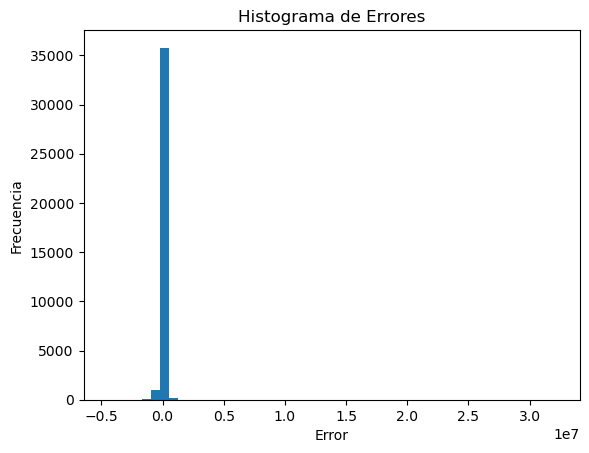

In [90]:
plt.hist(df['precio_real'] - df['predicciones'], bins=50)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.show()

In [94]:
# creo variable nueva entre cantidad de dormitorios y superficie cubierta 

df['dormitorios'].fillna(0, inplace=True)
df['superficie_propia'].fillna(0, inplace=True)

# Crear la nueva característica
df['relacion_dormitorios_superficie'] = df['dormitorios'] / df['superficie_propia']

# Puedes verificar si la nueva característica se ha creado correctamente
print(df[['dormitorios', 'superficie_propia', 'relacion_dormitorios_superficie']].head())

   dormitorios  superficie_propia  relacion_dormitorios_superficie
0          7.0              140.0                         0.050000
1          1.0               58.0                         0.017241
2          1.0               45.0                         0.022222
3          1.0               50.0                         0.020000
4          1.0               35.0                         0.028571


C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\2256757791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dormitorios'].fillna(0, inplace=True)
C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\2256757791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['superficie_propia'].fillna(0, inplace=True)
C:\Users\Fran\AppData\Local\Temp\ipykernel_9288\2256757791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

#### Aplicacion de SVM

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Crea un modelo SVR
svm_regressor = SVR(kernel='rbf')  # Puedes elegir diferentes kernels como 'linear', 'rbf', 'poly', etc.

In [98]:
# Entrena el modelo en los datos de entrenamiento
svm_regressor.fit(X_train, y_train)

SVR()

In [99]:
# Realizo predicciones en el conjunto de prueba
y_pred = svm_regressor.predict(X_test)

In [100]:
#uso el error cuadratico medio para evaluar
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 89144997697.20135


## Cross Validation entre mis modelos

In [103]:
# Crear los modelos
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svm_model = SVR(kernel='rbf')



In [104]:
# Realizar validación cruzada para cada modelo
# Modelo de Regresión Lineal
linear_reg_model = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_mse_scores = -linear_reg_scores
mean_linear_reg_mse = linear_reg_mse_scores.mean()



In [105]:
# Modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
random_forest_mse_scores = -random_forest_scores
mean_random_forest_mse = random_forest_mse_scores.mean()



In [ ]:
# Modelo SVM
svm_model = SVR(kernel='rbf')
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring='neg_mean_squared_error')
svm_mse_scores = -svm_scores
mean_svm_mse = svm_mse_scores.mean()



In [107]:
print("Modelo de Regresión Lineal")
print("Resultados de Cross-Validation (MSE):", linear_reg_mse_scores)
print("MSE Promedio:", mean_linear_reg_mse)
print()

print("Modelo de Random Forest")
print("Resultados de Cross-Validation (MSE):", random_forest_mse_scores)
print("MSE Promedio:", mean_random_forest_mse)
print()

print("Modelo SVM")
print("Resultados de Cross-Validation (MSE):", svm_mse_scores)
print("MSE Promedio:", mean_svm_mse)

Modelo de Regresión Lineal
Resultados de Cross-Validation (MSE): [4.36713461e+10 5.40768150e+10 8.16522974e+10 5.51056266e+10
 6.15139459e+10]
MSE Promedio: 59204006184.52505

Modelo de Random Forest
Resultados de Cross-Validation (MSE): [2.55044725e+10 2.76348317e+10 6.10434762e+10 2.93004732e+10
 2.18437154e+10]
MSE Promedio: 33065393806.124714

Modelo SVM
Resultados de Cross-Validation (MSE): [5.79002964e+10 7.14941123e+10 9.94864055e+10 1.58063517e+11
 9.21570116e+10]
MSE Promedio: 95820268613.08237


### Introducción:
En este análisis, exploraremos el mercado inmobiliario utilizando un conjunto de datos que contiene información sobre propiedades en Argentina, incluyendo detalles como la ubicación, el tipo de propiedad, los precios y más. Nuestro objetivo es comprender mejor el mercado y responder a diversas preguntas e hipótesis de interés.

#### Grafico 1: Cantidad de Inmuebles por Barrio

Pregunta: ¿Cuáles son los barrios con la mayor cantidad de inmuebles en el dataset?
Hipótesis: Los barrios más céntricos o populares tendrán una mayor cantidad de inmuebles en comparación con los barrios periféricos.

#### Grafico 2: Proporción de Tipos de Propiedad

Pregunta: ¿Cuáles son los tipos de propiedad más comunes en el mercado inmobiliario?
Hipótesis: La mayoría de los inmuebles disponibles pertenecen al tipo de propiedad "Departamento".

#### Grafico 3: Precio por Metro Cuadrado en Departamentos por Zona

Pregunta: ¿Cómo ha sido la variación del precio promedio de los departamentos en el año 2019?
Hipótesis: Los precios de los departamentos han experimentado fluctuaciones estacionales, con períodos de mayor demanda y precios más altos en ciertas épocas del año.

#### Grafico 4: Cantidad de Propiedades Publicadas por Mes

Pregunta: ¿Hay una tendencia general de aumento o disminución de la cantidad de propiedades publicadas a lo largo del año?
Hipótesis: La cantidad de propiedades publicadas tiende a aumentar o disminuir de manera gradual o cíclica a medida que transcurre el año.

#### Grafico 5: Relación entre Precio por Metro Cuadrado y Tamaño del Departamento

Pregunta: ¿Existe una relación entre el precio por metro cuadrado y el tamaño promedio del departamento?
Hipótesis: Existe una relación entre el precio por metro cuadrado y el tamaño promedio del departamento, lo que implica que los departamentos más grandes tienden a tener precios más altos.

### Conclusiones:

Se observa una fuerte correlación entre el número de ambientes en los departamentos y el precio promedio por metro cuadrado. Los departamentos con más ambientes generalmente tienen un precio por metro cuadrado más alto. Esto sugiere que el tamaño y la comodidad de una propiedad influyen significativamente en su valor en el mercado.
Esta conclusión adicional destaca la importancia de considerar el número de ambientes al evaluar el valor de una propiedad y puede ser útil para compradores que buscan propiedades que se ajusten a sus necesidades y presupuesto.

### Recomendaciones:

Dada la variación significativa en los precios por metro cuadrado entre diferentes zonas, se sugiere a los compradores potenciales que consideren ampliar su búsqueda a áreas cercanas menos costosas. Esto podría brindar oportunidades para obtener propiedades a precios más competitivos sin sacrificar la calidad o las comodidades deseadas.
Esta recomendación adicional ofrece a los posibles compradores una estrategia para explorar opciones más asequibles sin limitarse a una sola zona geográfica. Puede ayudar a los compradores a encontrar propiedades que se ajusten a su presupuesto y preferencias.

### Cierre:
En resumen, este análisis proporciona una visión más clara del mercado inmobiliario en Argentina y ofrece información valiosa para aquellos interesados en la compra o inversión en propiedades. Los datos y gráficos presentados nos permiten comprender mejor las tendencias y patrones del mercado.

